In [1]:
import requests
import pandas as pd 
url =  'https://datos.gob.cl/api/3/action/datastore_search?resource_id=cbd329c6-9fe6-4dc1-91e3-a99689fd0254'
response = requests.get(url) 
print(response)

<Response [200]>


<h3>Datos de API a DF</h3>

In [2]:
if response.status_code == 200: 
    data = response.json() 
    resultado = data.get("result",{}) 
    records = resultado.get("records",[]) 
    df = pd.DataFrame(records) #print(records) else: print("Error en la consulta")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   _id                  100 non-null    int64  
 1   CODIGO               100 non-null    int64  
 2   ENTIDAD              100 non-null    object 
 3   NOMBRE DE FANTASIA   100 non-null    object 
 4   DIRECCION            100 non-null    object 
 5   COMUNA               100 non-null    object 
 6   HORARIO REFERENCIAL  100 non-null    object 
 7   ESTE                 100 non-null    int64  
 8   NORTE                100 non-null    int64  
 9   LONGITUD             100 non-null    float64
 10  LATITUD              100 non-null    float64
dtypes: float64(2), int64(4), object(5)
memory usage: 8.7+ KB


In [4]:
df.isnull().sum()

_id                    0
CODIGO                 0
ENTIDAD                0
NOMBRE DE FANTASIA     0
DIRECCION              0
COMUNA                 0
HORARIO REFERENCIAL    0
ESTE                   0
NORTE                  0
LONGITUD               0
LATITUD                0
dtype: int64

In [5]:
#No hay valores nulos en la tabla

<h3>Eliminacion de columnas con vacias</h3>

In [6]:
df = df.loc[:, ~(df.isna() | (df == '')).all()]
df

,_id,CODIGO,ENTIDAD,NOMBRE DE FANTASIA,DIRECCION,COMUNA,ESTE,NORTE,LONGITUD,LATITUD
0,1,1224,Fullcarga,MARION,LOS DURAZNOS 356 A,ESTACION CENTRAL,342846,6291414,-70.710197,-33.466599
1,2,3316,Fullcarga,NISSY,JOAQUIN EDWARDS BELLO 10999,LA PINTANA,349448,6285070,-70.622688,-33.563601
2,3,9878,Fullcarga,ERICHOPER,LOS RETAMOS 5615,HUECHURABA,339133,6307750,-70.623108,-33.377819
3,4,10347,Fullcarga,DON ORLANDO,ARTURO PRAT 5725 DPTO 11,RENCA,338900,6302656,-70.732925,-33.403622
4,5,10489,Fullcarga,NOLBERTO VALDES NAVARRO,CALLE 462 5994,PEÑALOLEN,354367,6292018,-70.568390,-33.501755
...,...,...,...,...,...,...,...,...,...,...
95,96,92191,Fullcarga,ALMACEN ALICIA Y FIDEL,SANTA FE 744,SAN MIGUEL,346958,6290759,-70.648338,-33.512070
96,97,92193,Fullcarga,MINIMARKET HAROLDO,QUINCHAMALI 467,LA REINA,357045,6297110,-70.538757,-33.456203
97,98,92195,Fullcarga,3 ORIENTE,3 ORIENTE 3437,PEDRO AGUIRRE CERDA,344076,6294175,-70.678764,-33.480850
98,99,92199,Fullcarga,MINIMARKET,LOS CARACOLES 168,LA REINA,357466,6297365,-70.534195,-33.453957


In [7]:
columnas = ['NOMBRE DE FANTASIA', 'DIRECCION', 'COMUNA']
df.loc[:, columnas] = df[columnas].apply(lambda x: x.str.title())
df

,_id,CODIGO,ENTIDAD,NOMBRE DE FANTASIA,DIRECCION,COMUNA,ESTE,NORTE,LONGITUD,LATITUD
0,1,1224,Fullcarga,Marion,Los Duraznos 356 A,Estacion Central,342846,6291414,-70.710197,-33.466599
1,2,3316,Fullcarga,Nissy,Joaquin Edwards Bello 10999,La Pintana,349448,6285070,-70.622688,-33.563601
2,3,9878,Fullcarga,Erichoper,Los Retamos 5615,Huechuraba,339133,6307750,-70.623108,-33.377819
3,4,10347,Fullcarga,Don Orlando,Arturo Prat 5725 Dpto 11,Renca,338900,6302656,-70.732925,-33.403622
4,5,10489,Fullcarga,Nolberto Valdes Navarro,Calle 462 5994,Peñalolen,354367,6292018,-70.568390,-33.501755
...,...,...,...,...,...,...,...,...,...,...
95,96,92191,Fullcarga,Almacen Alicia Y Fidel,Santa Fe 744,San Miguel,346958,6290759,-70.648338,-33.512070
96,97,92193,Fullcarga,Minimarket Haroldo,Quinchamali 467,La Reina,357045,6297110,-70.538757,-33.456203
97,98,92195,Fullcarga,3 Oriente,3 Oriente 3437,Pedro Aguirre Cerda,344076,6294175,-70.678764,-33.480850
98,99,92199,Fullcarga,Minimarket,Los Caracoles 168,La Reina,357466,6297365,-70.534195,-33.453957


<h3>Ordenamiento y Conteo por Comuna</h3>

<h3>Asignación de Sectores a Comunas</h3>

In [8]:
# Norte:Conchalí, Huechuraba, Independencia, Recoleta y Quilicura
#SUr: Pedro Aguirre Cerda, San Miguel, San Joaquín, Lo Espejo, La Cisterna, La Granja, San Ramón, 
#######El Bosque, San Bernardo y La Pintana. 
#oriente: Providencia, Ñuñoa, La Reina, Las Condes, Vitacura y Lo Barnechea
#Poniente: Cerro Navia, Lo Prado, Pudahuel, Quinta Normal , Renca, Maipú, Cerrillos, Estación Central y Padre Hurtado
mapeo_sectores = {
    #Norte
    "Conchali": "Norte", 
    "Huechuraba": "Norte",
    "Independencia": "Norte",
    "Recoleta": "Norte" ,
    "Quilicura" :  "Norte",
    #Sur
    "Pedro Aguirre Cerda": "Sur",
    "San Miguel" :"Sur",
    "San Joaquin": "Sur", 
    "Lo Espejo": "Sur",
    "La Cisterna": "Sur",
    "La Granja": "Sur",
  
  "San Ramon": "Sur" ,
    "El Bosque":"Sur",
    "San Bernardo": "Sur",
    "La Pintana": "Sur",
    "La Florida": "Sur",
    "Puente Alto":"Sur",
    #Oriente
    "Providencia":"Oriente", 
    "Ñuñoa":"Oriente",
    "La Reina":"Oriente",
    "Las Condes":"Oriente",
    "Vitacura":"Oriente", 
    "Lo Barnechea":"Oriente",
    "Peñalolen":"Oriente",
    #Poniente
    "Cerro Navia":"Poniente",
    "Lo Prado":"Poniente",
    "Pudahuel":"Poniente",
    "Quinta Normal":"Poniente" ,
    "Renca":"Poniente",
    "Maipu":"Poniente",
    "Cerrillos":"Poniente",
    "Estacion Central":"Poniente",
    "Padre Hurtado":"Poniente",
    "Santiago": "Centro",
    "Macul": "Centro"
}

df['SECTOR'] = df['COMUNA'].map(mapeo_sectores)
df

,_id,CODIGO,ENTIDAD,NOMBRE DE FANTASIA,DIRECCION,COMUNA,ESTE,NORTE,LONGITUD,LATITUD,SECTOR
0,1,1224,Fullcarga,Marion,Los Duraznos 356 A,Estacion Central,342846,6291414,-70.710197,-33.466599,Poniente
1,2,3316,Fullcarga,Nissy,Joaquin Edwards Bello 10999,La Pintana,349448,6285070,-70.622688,-33.563601,Sur
2,3,9878,Fullcarga,Erichoper,Los Retamos 5615,Huechuraba,339133,6307750,-70.623108,-33.377819,Norte
3,4,10347,Fullcarga,Don Orlando,Arturo Prat 5725 Dpto 11,Renca,338900,6302656,-70.732925,-33.403622,Poniente
4,5,10489,Fullcarga,Nolberto Valdes Navarro,Calle 462 5994,Peñalolen,354367,6292018,-70.568390,-33.501755,Oriente
...,...,...,...,...,...,...,...,...,...,...,...
95,96,92191,Fullcarga,Almacen Alicia Y Fidel,Santa Fe 744,San Miguel,346958,6290759,-70.648338,-33.512070,Sur
96,97,92193,Fullcarga,Minimarket Haroldo,Quinchamali 467,La Reina,357045,6297110,-70.538757,-33.456203,Oriente
97,98,92195,Fullcarga,3 Oriente,3 Oriente 3437,Pedro Aguirre Cerda,344076,6294175,-70.678764,-33.480850,Sur
98,99,92199,Fullcarga,Minimarket,Los Caracoles 168,La Reina,357466,6297365,-70.534195,-33.453957,Oriente


In [9]:

conteo_puntos = df['COMUNA'].value_counts(
    normalize=False,  
    sort=True,        # Ordenar por frecuencia
    ascending=False,  # De mayor a menor frecuencia
    dropna=True       # Excluir valores NaN
)
print(conteo_puntos)

COMUNA
Cerrillos              8
Estacion Central       7
Quilicura              7
La Pintana             7
Pedro Aguirre Cerda    6
Renca                  5
Recoleta               5
Maipu                  5
San Bernardo           4
Peñalolen              4
Cerro Navia            4
El Bosque              3
Las Condes             3
Puente Alto            3
Santiago               3
Macul                  3
San Ramon              3
Huechuraba             2
Quinta Normal          2
Lo Espejo              2
Providencia            2
San Miguel             2
La Reina               2
Vitacura               2
San Joaquin            1
La Florida             1
La Granja              1
Pudahuel               1
Lo Barnechea           1
Independencia          1
Name: count, dtype: int64


In [10]:
poblacion_comunas = {
    # Norte
    "Conchali": 125000,
    "Huechuraba": 105000,
    "Independencia": 85000,
    "Recoleta": 155000,
    "Quilicura": 220000,
    
    # Sur
    "Pedro Aguirre Cerda": 115000,
    "San Miguel": 95000,
    "San Joaquin": 105000,
    "Lo Espejo": 125000,
    "La Cisterna": 90000,
    "La Granja": 135000,
    "San Ramon": 105000,
    "El Bosque": 185000,
    "San Bernardo": 285000,
    "La Pintana": 195000,
    "La Florida": 407927,
    "Puente Alto": 667904,
    
    # Oriente
    "Providencia": 120000,
    "Ñuñoa": 185000,
    "La Reina": 95000,
    "Las Condes": 285000,
    "Vitacura": 85000,
    "Lo Barnechea": 105000,
    "Peñalolen": 272913,
    
    # Poniente
    "Cerro Navia": 145000,
    "Lo Prado": 105000,
    "Pudahuel": 225000,
    "Quinta Normal": 115000,
    "Renca": 145000,
    "Maipu": 520000,
    "Cerrillos": 85000,
    "Estacion Central": 135000,
    "Padre Hurtado": 65000,
    "Santiago": 404495,
    "Macul":116534
    
}
df['POBLACION'] = df['COMUNA'].map(poblacion_comunas)
df

,_id,CODIGO,ENTIDAD,NOMBRE DE FANTASIA,DIRECCION,COMUNA,ESTE,NORTE,LONGITUD,LATITUD,SECTOR,POBLACION
0,1,1224,Fullcarga,Marion,Los Duraznos 356 A,Estacion Central,342846,6291414,-70.710197,-33.466599,Poniente,135000
1,2,3316,Fullcarga,Nissy,Joaquin Edwards Bello 10999,La Pintana,349448,6285070,-70.622688,-33.563601,Sur,195000
2,3,9878,Fullcarga,Erichoper,Los Retamos 5615,Huechuraba,339133,6307750,-70.623108,-33.377819,Norte,105000
3,4,10347,Fullcarga,Don Orlando,Arturo Prat 5725 Dpto 11,Renca,338900,6302656,-70.732925,-33.403622,Poniente,145000
4,5,10489,Fullcarga,Nolberto Valdes Navarro,Calle 462 5994,Peñalolen,354367,6292018,-70.568390,-33.501755,Oriente,272913
...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,92191,Fullcarga,Almacen Alicia Y Fidel,Santa Fe 744,San Miguel,346958,6290759,-70.648338,-33.512070,Sur,95000
96,97,92193,Fullcarga,Minimarket Haroldo,Quinchamali 467,La Reina,357045,6297110,-70.538757,-33.456203,Oriente,95000
97,98,92195,Fullcarga,3 Oriente,3 Oriente 3437,Pedro Aguirre Cerda,344076,6294175,-70.678764,-33.480850,Sur,115000
98,99,92199,Fullcarga,Minimarket,Los Caracoles 168,La Reina,357466,6297365,-70.534195,-33.453957,Oriente,95000


In [17]:
df.isnull().sum()

_id                   0
CODIGO                0
ENTIDAD               0
NOMBRE DE FANTASIA    0
DIRECCION             0
COMUNA                0
ESTE                  0
NORTE                 0
LONGITUD              0
LATITUD               0
SECTOR                0
POBLACION             0
dtype: int64

<h3>Analisis Estadistico</h3>
<h4>Cantidad de puntos de recarga por Sector</h4>

In [13]:
conteo_sector = df['SECTOR'].value_counts(
    normalize=False,  
    sort=True,        # Ordenar por frecuencia
    ascending=False,  # De mayor a menor frecuencia
    dropna=True       # Excluir valores NaN
)
print(conteo_sector)

SECTOR
Sur         33
Poniente    32
Norte       15
Oriente     14
Centro       6
Name: count, dtype: int64


<h4>Porcentaje de Puntos de Venta por Comuna</h4>

In [14]:
porcentaje_comunas = df['COMUNA'].value_counts(normalize=True) * 100
porcentaje_comunas = porcentaje_comunas.round(2)

# Mostrar resultados en orden descendente
print("PORCENTAJE DE LUGARES POR COMUNA (Orden descendente):")
print("=" * 50)
for comuna, porcentaje in porcentaje_comunas.items():
    print(f"{comuna}: {porcentaje}%")

PORCENTAJE DE LUGARES POR COMUNA (Orden descendente):
Cerrillos: 8.0%
Estacion Central: 7.0%
Quilicura: 7.0%
La Pintana: 7.0%
Pedro Aguirre Cerda: 6.0%
Renca: 5.0%
Recoleta: 5.0%
Maipu: 5.0%
San Bernardo: 4.0%
Peñalolen: 4.0%
Cerro Navia: 4.0%
El Bosque: 3.0%
Las Condes: 3.0%
Puente Alto: 3.0%
Santiago: 3.0%
Macul: 3.0%
San Ramon: 3.0%
Huechuraba: 2.0%
Quinta Normal: 2.0%
Lo Espejo: 2.0%
Providencia: 2.0%
San Miguel: 2.0%
La Reina: 2.0%
Vitacura: 2.0%
San Joaquin: 1.0%
La Florida: 1.0%
La Granja: 1.0%
Pudahuel: 1.0%
Lo Barnechea: 1.0%
Independencia: 1.0%


In [16]:
porcentaje_Sectores = df['SECTOR'].value_counts(normalize=True) * 100
porcentaje_Sectores = porcentaje_Sectores.round(2)

# Mostrar resultados en orden descendente
print("PORCENTAJE DE LUGARES POR SECTOR (Orden descendente):")
print("=" * 50)
for Sectores, porcentaje in porcentaje_Sectores.items():
    print(f"{Sectores}: {porcentaje}%")

PORCENTAJE DE LUGARES POR SECTOR (Orden descendente):
Sur: 33.0%
Poniente: 32.0%
Norte: 15.0%
Oriente: 14.0%
Centro: 6.0%


In [20]:
# Calcular densidad de puntos por cada 1000 habitantes
densidad = df.groupby('COMUNA').agg(
    Puntos=('COMUNA', 'count'),
    Poblacion=('POBLACION', 'first')
).reset_index()

densidad['Puntos_por_1000hab'] = (densidad['Puntos'] / densidad['Poblacion'] * 1000).round(4)
densidad = densidad.sort_values('Puntos_por_1000hab', ascending=False)

# Mostrar resultados
print("DENSIDAD DE PUNTOS POR CADA 1000 HABITANTES POR COMUNA")
print("=" * 65)
print(f"{'Comuna':<25} {'Puntos':<8} {'Población':<12} {'Puntos/1000hab':<15}")
print("-" * 65)

for _, row in densidad.iterrows():
    print(f"{row['COMUNA']:<25} {row['Puntos']:<8} {row['Poblacion']:<12} {row['Puntos_por_1000hab']:<15}")

DENSIDAD DE PUNTOS POR CADA 1000 HABITANTES POR COMUNA
Comuna                    Puntos   Población    Puntos/1000hab 
-----------------------------------------------------------------
Cerrillos                 8        85000        0.0941         
Pedro Aguirre Cerda       6        115000       0.0522         
Estacion Central          7        135000       0.0519         
La Pintana                7        195000       0.0359         
Renca                     5        145000       0.0345         
Recoleta                  5        155000       0.0323         
Quilicura                 7        220000       0.0318         
San Ramon                 3        105000       0.0286         
Cerro Navia               4        145000       0.0276         
Macul                     3        116534       0.0257         
Vitacura                  2        85000        0.0235         
San Miguel                2        95000        0.0211         
La Reina                  2        95000       

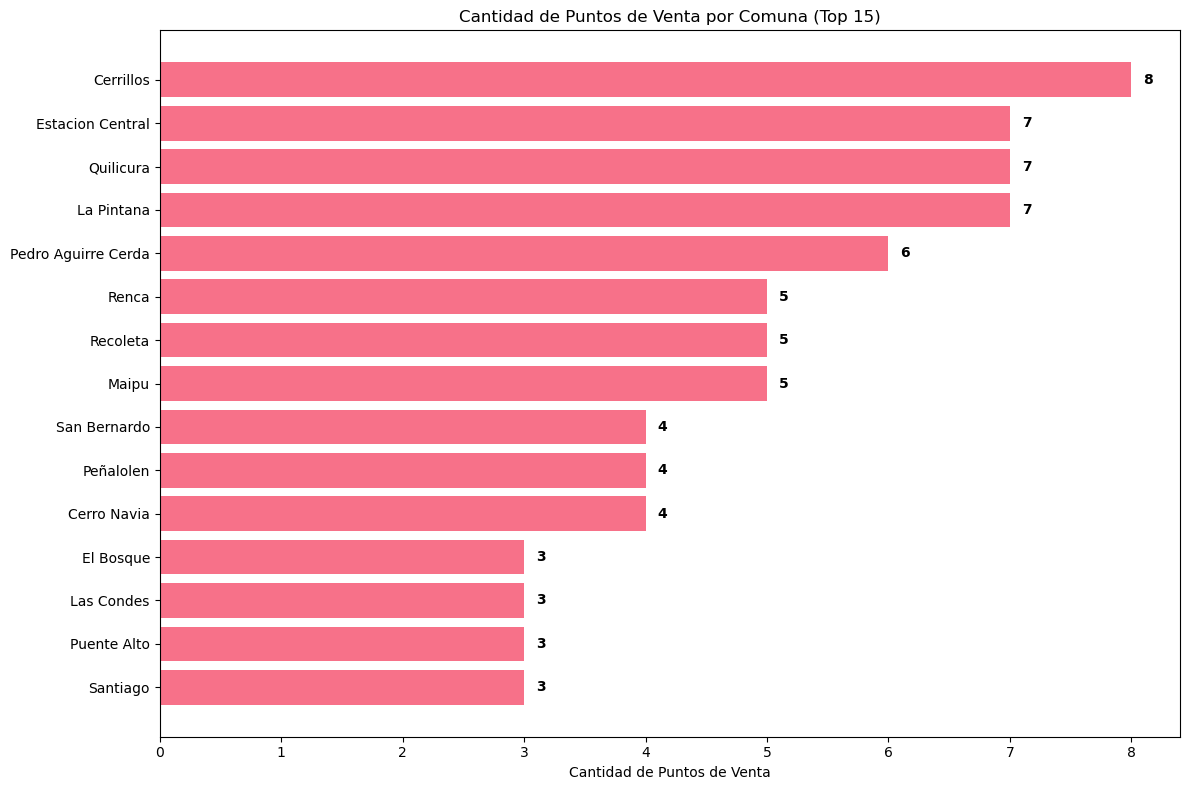

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración general de los gráficos
plt.style.use('default')
sns.set_palette("husl")

# 1. GRÁFICO: CANTIDAD DE PUNTOS POR COMUNA
plt.figure(figsize=(12, 8))
puntos_comuna = df['COMUNA'].value_counts().head(15)  # Top 15 comunas

bars = plt.barh(puntos_comuna.index, puntos_comuna.values)
plt.xlabel('Cantidad de Puntos de Venta')
plt.title('Cantidad de Puntos de Venta por Comuna (Top 15)')
plt.gca().invert_yaxis()
for bar, valor in zip(bars, puntos_comuna.values):
    plt.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height()/2, 
             f'{valor}', ha='left', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

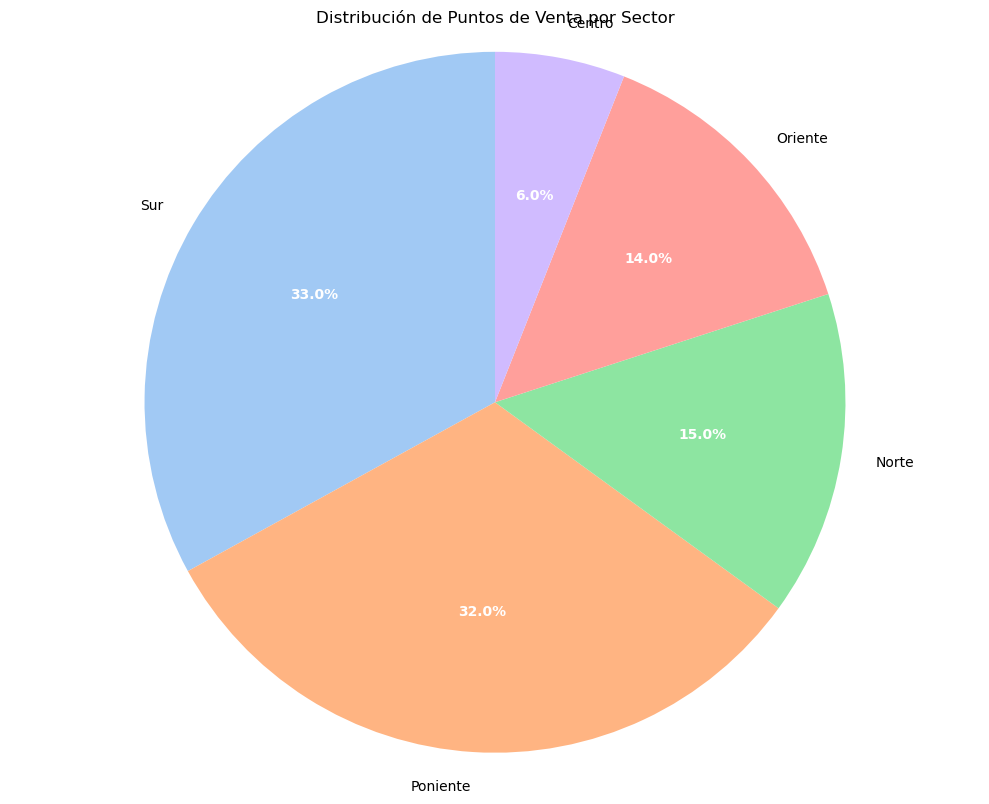

In [26]:
plt.figure(figsize=(10, 8))
porcentaje_sector = df['SECTOR'].value_counts(normalize=True) * 100

# Gráfico de torta
wedges, texts, autotexts = plt.pie(porcentaje_sector.values, 
                                   labels=porcentaje_sector.index, 
                                   autopct='%1.1f%%',
                                   startangle=90,
                                   colors=sns.color_palette("pastel"))


for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(10)
    plt.title('Distribución de Puntos de Venta por Sector')
plt.axis('equal')  # Para que el pie chart sea circular
plt.tight_layout()
plt.show()

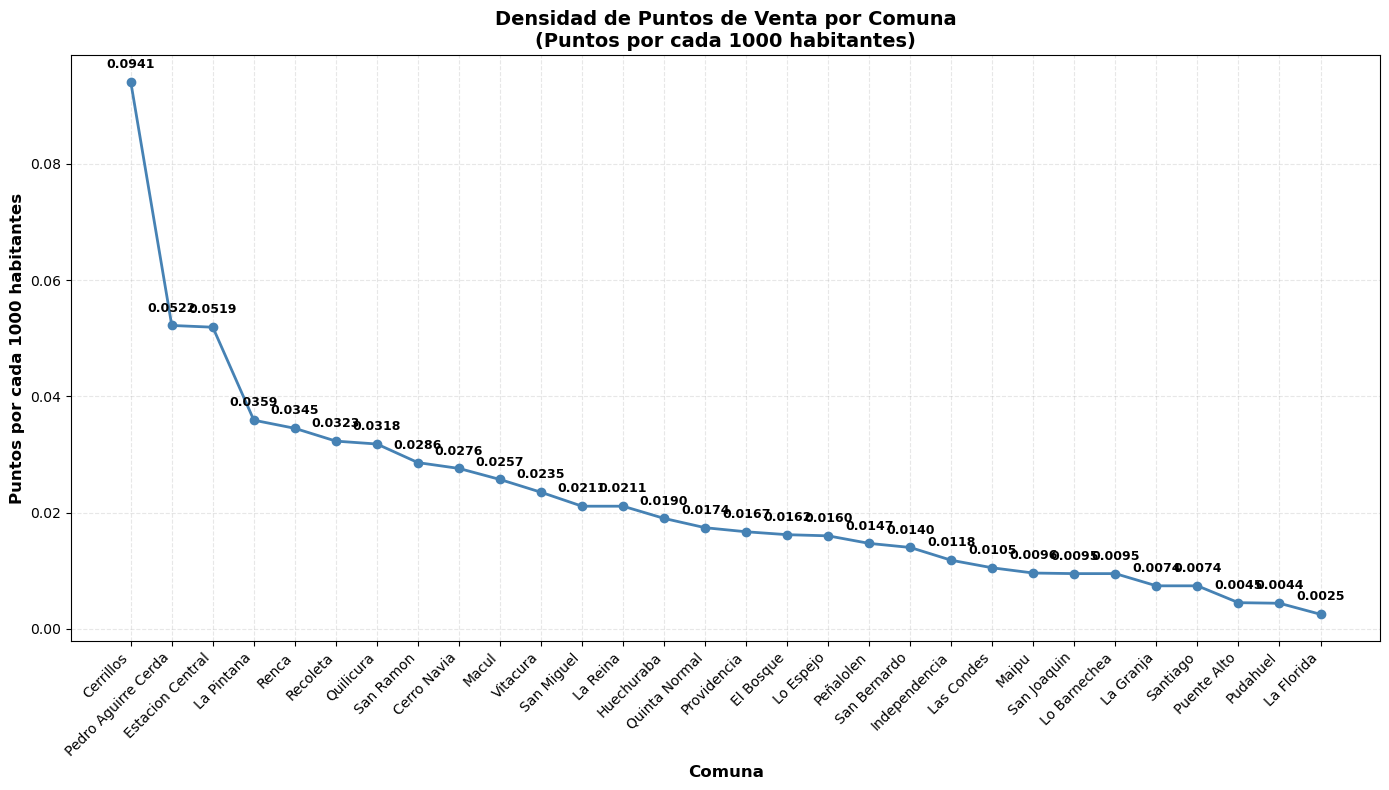

In [27]:
plt.style.use('default')
plt.figure(figsize=(14, 8))

# Ordenar por densidad para el gráfico
densidad_ordenada = densidad.sort_values('Puntos_por_1000hab', ascending=False)

# Crear gráfico de líneas
plt.plot(densidad_ordenada['COMUNA'], densidad_ordenada['Puntos_por_1000hab'], 
         marker='o', linewidth=2, markersize=6, color='steelblue')

# Personalizar el gráfico
plt.xlabel('Comuna', fontsize=12, fontweight='bold')
plt.ylabel('Puntos por cada 1000 habitantes', fontsize=12, fontweight='bold')
plt.title('Densidad de Puntos de Venta por Comuna\n(Puntos por cada 1000 habitantes)', 
          fontsize=14, fontweight='bold')

# Rotar etiquetas del eje X para mejor legibilidad
plt.xticks(rotation=45, ha='right')

# Agregar grid
plt.grid(True, alpha=0.3, linestyle='--')

# Agregar valores en los puntos
for i, (comuna, densidad_val) in enumerate(zip(densidad_ordenada['COMUNA'], 
                                              densidad_ordenada['Puntos_por_1000hab'])):
    plt.annotate(f'{densidad_val:.4f}', 
                 (comuna, densidad_val),
                 textcoords="offset points", 
                 xytext=(0,10), 
                 ha='center',
                 fontsize=9,
                 fontweight='bold')

# Ajustar layout
plt.tight_layout()
plt.show()